## Observations and Insights 

#Ramicane appears to have the smallest average tumor volume followed by Capolumin
#There appears to be a positive correlation between Avg Tumor Volume vs. Mouse Weight for the Capomulin Regimen
#There weren't many duplicates identified in the data set
#The female to male ratio of tested mice were almost equal  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata,study_results, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mouse = mouse_data_complete["Mouse ID"].value_counts() 
unique_mouse.count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"]
duplicates.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_list = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicates_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse2 = updated_mouse_data["Mouse ID"].value_counts()
unique_mouse2.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = updated_mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_median = updated_mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_var = updated_mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_stdev = updated_mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_sem =updated_mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame()
summary_stats_df["Average Volume"] = regimen_mean 
summary_stats_df["Median Volume"] = regimen_median
summary_stats_df["Variance"] = regimen_var
summary_stats_df["StDev"] = regimen_stdev
summary_stats_df["SEM"] = regimen_sem

summary_stats_df


,Average Volume,Median Volume,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df2 = updated_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stats_df2.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

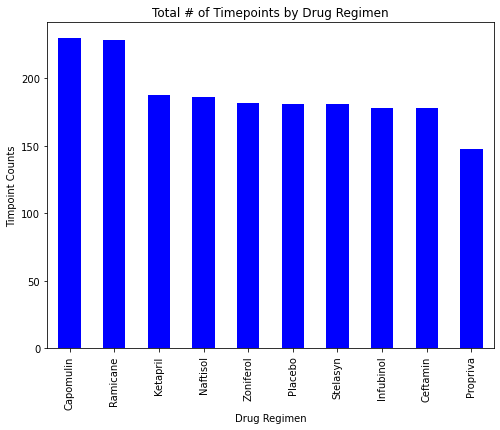

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
#for each drug regimen using Pandas.
total_timepoints = updated_mouse_data["Drug Regimen"].value_counts()
total_timepoints.plot(kind="bar",facecolor="blue", figsize=(8,6),
                                title="Total # of Timepoints by Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Timpoint Counts")

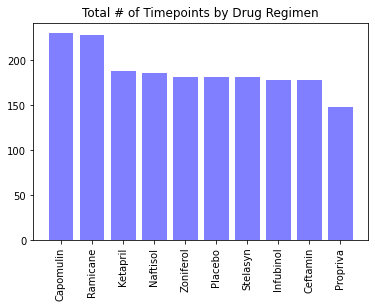

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
#each drug regimen using pyplot.
plt.bar(total_timepoints.index.values, total_timepoints.values, color='b', alpha=0.5, align="center")
plt.title("Total # of Timepoints by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

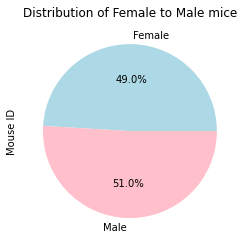

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
updated_mouse_data.groupby(["Sex"]).count().plot(kind= "pie", y="Mouse ID", legend=False, autopct='%1.1f%%', colors = ["lightblue", "pink"],
                                                     title ="Distribution of Female to Male mice" )


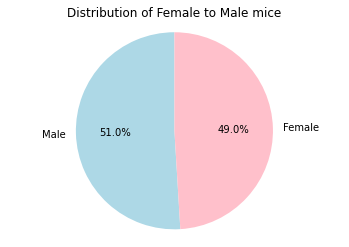

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mice = updated_mouse_data[(updated_mouse_data["Sex"] == "Male")].count()["Mouse ID"]
female_mice = updated_mouse_data[(updated_mouse_data["Sex"] == "Female")].count()["Mouse ID"]
counts = [male_mice, female_mice]
gender = ["Male", "Female"]
colors = ["lightblue","pink"]
plt.pie(counts, labels=gender, colors=colors,autopct="%1.1f%%", startangle=90)
plt.title(label="Distribution of Female to Male mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_df = updated_mouse_data[(updated_mouse_data["Drug Regimen"] == "Capomulin") | (updated_mouse_data["Drug Regimen"] == "Ramicane") | 
    (updated_mouse_data["Drug Regimen"] == "Infubinol")| (updated_mouse_data["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = reduced_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_mouse_df = pd.merge(greatest_timepoint,updated_mouse_data, how="left", on=["Mouse ID", "Mouse ID"])
new_mouse_df.head()

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = new_mouse_df["Drug Regimen"].unique()
#treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = new_mouse_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f"The lower quartile of the tumor size is: {lowerq}")
# print(f"The upper quartile of the tumor size is: {upperq}")
# print(f"The interquartile range of the tumor size is: {iqr}")
# print(f"The the median of the tumor size is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volume = new_mouse_df.loc[new_mouse_df["Drug Regimen"] == drug , "Tumor Volume (mm3)"]    
    tumor_vol.append(volume)    

# add subset 
outliers = new_mouse_df[(new_mouse_df["Tumor Volume (mm3)"] > upper_bound) | (new_mouse_df["Tumor Volume (mm3)"] < upper_bound)]
outliers_r = outliers.loc[outliers["Drug Regimen"] == 'Ramicane', "Tumor Volume (mm3)"]
outliers_c = outliers.loc[outliers["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]   
outliers_i = outliers.loc[outliers["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"] 
outliers_cn = outliers.loc[outliers["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"] 
#     # Determine outliers using upper and lower bounds
print(f"The potential outliers for Ramicane are {outliers_r} ")    
print("")
print(f"The potential outliers for Capomulin are {outliers_c} ")
print("")
print(f"The potential outliers for Infubinol are {outliers_i} ")
print("")
print(f"The potential outliers for Ceftamin are {outliers_cn} ")

The potential outliers for Ramicane are 30     45.000000
31     45.466677
32     40.759788
33     41.484169
34     38.087373
         ...    
799    37.414114
800    37.815935
801    38.504824
802    34.022093
803    30.638696
Name: Tumor Volume (mm3), Length: 228, dtype: float64 

The potential outliers for Capomulin are 87     45.000000
88     45.651331
89     43.270852
90     43.784893
91     42.731552
         ...    
779    38.992734
780    35.726023
781    36.327870
782    31.475411
783    31.896238
Name: Tumor Volume (mm3), Length: 230, dtype: float64 

The potential outliers for Infubinol are 0      45.000000
1      48.508468
2      51.852437
3      52.777870
4      55.173336
         ...    
809    54.316407
810    56.286750
811    58.628399
812    60.053740
813    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64 

The potential outliers for Ceftamin are 20     45.000000
21     46.795257
22     47.371343
23     49.734404
24     50.513437
         ...    
789    

Text(0, 0.5, 'Tumor Volume')

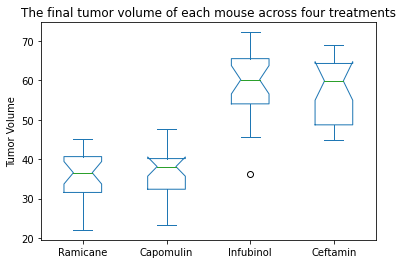

In [15]:
final_tumor = new_mouse_df[new_mouse_df["Timepoint_y"] == new_mouse_df["Timepoint_x"]]
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_r = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
box_c = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
box_i = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]
box_cn = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]
new_list = {"Ramicane": box_r,"Capomulin": box_c, "Infubinol": box_i, "Ceftamin": box_cn}

final_tumor_df = pd.DataFrame(new_list) 
final_tumor_df
final_tumor_df.plot(kind="box", notch=True)
plt.title("The final tumor volume of each mouse across four treatments")
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

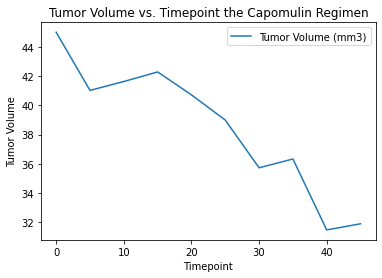

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lplot = updated_mouse_data[updated_mouse_data["Mouse ID"] == "y793"]
lplot.plot("Timepoint", "Tumor Volume (mm3)", kind="line")
plt.title("Tumor Volume vs. Timepoint the Capomulin Regimen")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Avg Tumor size')

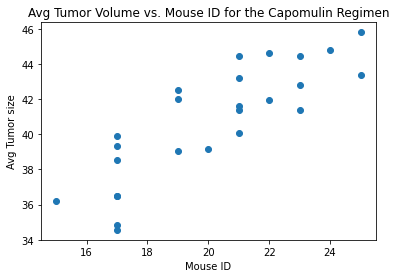

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_scatter = updated_mouse_data.loc[(updated_mouse_data["Drug Regimen"] == "Capomulin")] 
mouse_scatter = mouse_scatter.groupby(["Mouse ID"]).mean()
plt.scatter(mouse_scatter["Weight (g)"], mouse_scatter["Tumor Volume (mm3)"])
plt.title("Avg Tumor Volume vs. Mouse ID for the Capomulin Regimen")
plt.xlabel("Mouse ID")
plt.ylabel("Avg Tumor size")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = mouse_scatter.loc[:,"Weight (g)"]
y_val = mouse_scatter.loc[:,"Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.stats.linregress(x_val, y_val)

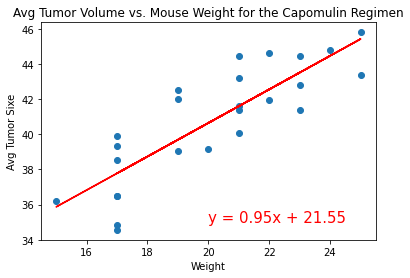

The correlation between both factors is 0.84


In [19]:
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Avg Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Sixe")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")